This notebook focuses on some basics of data analysis: linear regression, optimization and Bayesian inference.


# Least squares linear regression: basics



Let's start by implementing a simple least squares fit using analytical expressions.

Plot the data provided below. Calculate the least squares estimate for the slope $a$ and intercept $b$ ($y=ax+b$) with the analytical formulae mentioned in lectures and add the corresponding line to your plot.

coeff a : 50.494053105000006
coeff b : 26.599999999999998
Slope (a): 1.8982726731203012
Intercept (b): 1.261222194571428


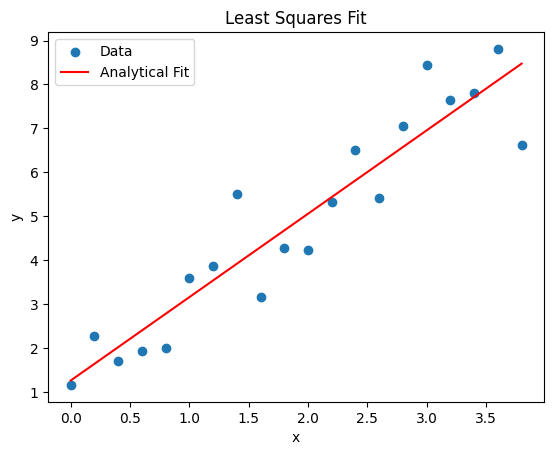

In [28]:
import numpy
import pylab

xarray = numpy.arange(20.)/5
yarray = numpy.array([1.16100793, 2.27070892+8.*0., 1.7102285 , 1.92216664 ,2.00306275 ,3.60437835,
 3.8682993 , 5.51139028, 3.16760897, 4.27715062, 4.22776111, 5.33520844,
 6.50611469, 5.4146256,  7.04786637, 8.44454962, 7.63848438, 7.81296952,
 8.80991074 ,6.62531274])

mean_x = numpy.mean(xarray)
mean_y = numpy.mean(yarray)

coeff_a = numpy.sum((xarray - mean_x) * (yarray - mean_y))
coeff_b = numpy.sum((xarray - mean_x)**2)

print('coeff a :', coeff_a)
print('coeff b :', coeff_b)

numerator = numpy.sum((xarray - mean_x) * (yarray - mean_y))
denominator = numpy.sum((xarray - mean_x)**2)

a_analytical = numerator / denominator
b_analytical = mean_y - a_analytical * mean_x

print(f"Slope (a): {a_analytical}")
print(f"Intercept (b): {b_analytical}")

# Plot the data
pylab.scatter(xarray, yarray, label='Data')
pylab.xlabel('x')
pylab.ylabel('y')
pylab.title('Least Squares Fit')

# Add the analytical least squares line to the plot
pylab.plot(xarray, a_analytical * xarray + b_analytical, color='red', label='Analytical Fit')
pylab.legend()
pylab.show()

Now recompute the least-squares slope $a$ and intercept $b$ by numerically minimizing/optimizing the least squares loss function $\sum_i (y(x_i)-f(x_i,a,b))^2$. You may wish to use the numerical optimization routine included below. Do you find the same result as in the analytical calculation? Replot the data along with the best fit line you have derived.

Repeat your optimization but with an L1 loss function and add the corresponding line to your plot.



Numerical L2 Fit - Slope (a): 1.8982726685413012, Intercept (b): 1.261222183944693
Numerical L1 Fit - Slope (a): 2.025487136810053, Intercept (b): 1.0530815082905238


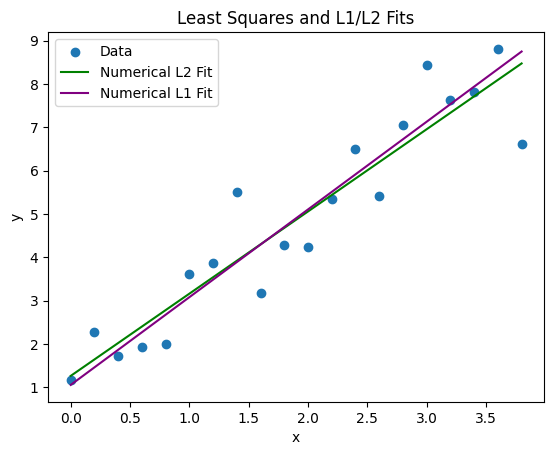

In [29]:
def loss2(coeff,xarray,yarray):
  #add your loss function here
  loss = numpy.sum((yarray - coeff[0]*xarray - coeff[1])**2)
  return loss

def loss1(coeff, xarray, yarray):
  loss = numpy.sum(numpy.abs(yarray - coeff[0]*xarray - coeff[1]))
  return loss


from scipy.optimize import minimize

start = [1.,1.]

# Minimize with L2 loss
minimum_l2 = minimize(loss2,x0=start,args=(xarray,yarray), method='BFGS')
a_numerical_l2, b_numerical_l2 = minimum_l2.x
print(f"Numerical L2 Fit - Slope (a): {a_numerical_l2}, Intercept (b): {b_numerical_l2}")

# Minimize with L1 loss
minimum_l1 = minimize(loss1,x0=start,args=(xarray,yarray), method='BFGS')
a_numerical_l1, b_numerical_l1 = minimum_l1.x
print(f"Numerical L1 Fit - Slope (a): {a_numerical_l1}, Intercept (b): {b_numerical_l1}")

pylab.scatter(xarray, yarray, label='Data')
pylab.xlabel('x')
pylab.ylabel('y')
pylab.title('Least Squares and L1/L2 Fits')

pylab.plot(xarray, a_numerical_l2 * xarray + b_numerical_l2, color='green', label='Numerical L2 Fit')
pylab.plot(xarray, a_numerical_l1 * xarray + b_numerical_l1, color='purple', label='Numerical L1 Fit')
pylab.legend()
pylab.show()


Finally, perturb one of the data points so that it is a noticeable outlier, and show that the line derived from L1 optimization is less affected than L2.

# Adding more parameters

Now consider a new data vector, provided below, which contains an oscillatory feature with a known period and phase but an unknown amplitude $c$. Plot the new data. Using L2/least squares optimization and assuming the model function $f=ax+b+c \sin(5x)$, find the best fit three parameter model (described by the parameters $a, b, c$.)

Numerical L2 Fit - Slope (a): 1.902459515079215, Intercept (b): 1.2531225617870363, Amplitude (c): -0.9660796969583995


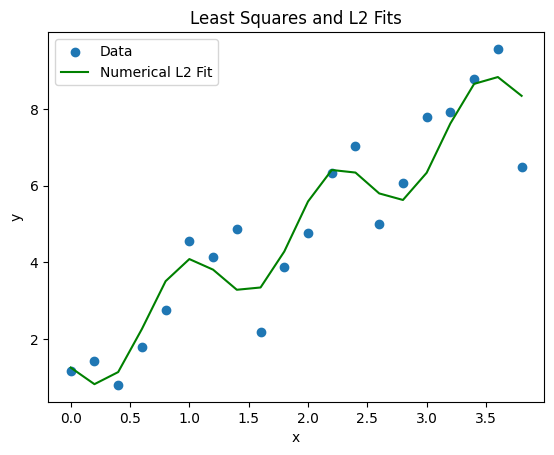

In [40]:
#new data vector with oscillatory feature
xarray = numpy.arange(20.)/5
yarray = numpy.array([1.16100793, 1.42923794, 0.80093107, 1.78104663, 2.75986525, 4.56330262,
 4.1477148,  4.85440368, 2.17825072, 3.86503213, 4.77178222, 6.33519865,
 7.04268761, 4.99445856, 6.05725901, 7.79426178, 7.9263877,  8.77436701,
 9.56089799, 6.47543553])

start = [1.,1.,1.]

def f2(x,m,c,s):
  f2 = m*x+c+s*numpy.sin(5*x)
  return f2

def loss2(coeff,xarray,yarray):
  #add your loss function here
  loss = numpy.sum((yarray - f2(xarray, coeff[0], coeff[1], coeff[2]))**2)
  return loss

# Minimize with L2 loss
minimum_l2 = minimize(loss2,x0=start,args=(xarray,yarray), method='BFGS')
a_numerical_l2_osc, b_numerical_l2_osc, c_numerical_l2_osc = minimum_l2.x

print(f"Numerical L2 Fit - Slope (a): {a_numerical_l2_osc}, Intercept (b): {b_numerical_l2_osc}, Amplitude (c): {c_numerical_l2_osc}")

pylab.scatter(xarray, yarray, label='Data')
pylab.xlabel('x')
pylab.ylabel('y')
pylab.title('Least Squares and L2 Fits')

pylab.plot(xarray, a_numerical_l2_osc * xarray + b_numerical_l2_osc + c_numerical_l2_osc * numpy.sin(5 * xarray), color='green', label='Numerical L2 Fit')
pylab.legend()
pylab.show()



# Bayesian Data Analysis

We now turn to Bayesian data analysis. Our original data vector (without oscillations) now has errors, provided below. Write down a likelihood, a prior (you may assume it is just a constant for now), and evaluate the posterior probability on a grid of slope $a$ and intercept $b$ values. Plot this 2D posterior.

In [ ]:
#The original data vector, but this time with errors!
xarray = numpy.arange(20.)/5
yarray = numpy.array([1.16100793, 2.27070892, 1.7102285 , 1.92216664 ,2.00306275 ,3.60437835,
 3.8682993 , 5.51139028, 3.16760897, 4.27715062, 4.22776111, 5.33520844,
 6.50611469, 5.4146256,  7.04786637, 8.44454962, 7.63848438, 7.81296952,
 8.80991074 ,6.62531274])
yarrayError = yarray*0.+1.

def loglikelihood(vals):
  # loglike = #### Write down log(likelihood) function. Vals is 2D array [vals[0],vals[1]]
  loglike = numpy.sum(-0.5*numpy.log(2*numpy.pi*yarrayError**2) - (yarray-vals[0]*xarray-vals[1])**2/(2*yarrayError**2))
  return loglike

#### you may wish to use this function
def gridEvaluateFunction(function, xvals, yvals):
    #### returns 2d array of function values evaluated on a, b grid values
    functionValues = numpy.zeros((len(xvals), len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            functionValues[i, j] = function([xvals[i], yvals[j]])
    return functionValues

#### example usage with a function loglikelihood (function of a 2D array)
a_grid = numpy.linspace(-3.,7.,256)
b_grid = numpy.linspace(-4.,6.,256)
logongrid = gridEvaluateFunction(loglikelihood,a_grid,b_grid)


Now, derive the marginalized posterior probability for $a$ by integrating or summing the posterior over the $b$ axis. Plot your result. Repeat this for the posterior on $b$.

In [ ]:
#p_a_marg =

Repeat the above Bayesian parameter analysis for the sinusoidal dataset and 3-parameter fit. Derive marginalized posteriors for $a$, $b$, and $c$.


In [ ]:
def loglikelihood2(vals):
  loglike2 = #### Write down log(likelihood) function
  return loglike2

#### you may wish to use this function - a 3d version of evaluate_on_grid
def gridEvaluateFunction3D(function, xvals, yvals, zvals):
    functionValues = numpy.zeros((len(xvals), len(yvals),len(zvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            for k in range(len(zvals)):
              functionValues[i, j, k] = function([xvals[i], yvals[j], zvals[k]])
    return functionValues


#use data vector with oscillatory feature
xarray = numpy.arange(20.)/5
yarray = numpy.array([1.16100793, 1.42923794, 0.80093107, 1.78104663, 2.75986525, 4.56330262,
 4.1477148,  4.85440368, 2.17825072, 3.86503213, 4.77178222, 6.33519865,
 7.04268761, 4.99445856, 6.05725901, 7.79426178, 7.9263877,  8.77436701,
 9.56089799, 6.47543553])


#see below for example calculation of marginalized posterior for the slope parameter a.
#this evaluation uses only 60 grid points in each dimension
a_grid = numpy.linspace(0.,4.,60)
b_grid = numpy.linspace(-1.,3.,60)
c_grid = numpy.linspace(-3.,1.,60)

logongrid2 = gridEvaluateFunction3D(loglikelihood2,a_grid,b_grid,c_grid)
ongrid2 = numpy.exp(logongrid2)
# note: some care is required to integrate over the correct axes
p_a_marg = numpy.sum(ongrid2,axis=(1,2))


Note the evaluation gets very slow when we make our grid finer! I.e. if we change numpy.linspace(...,60) to a significantly larger number of grid points the algorithm cannot be run. A faster method, which scales well to larger number of parameters, is required... MCMC.

# MCMC


Now we will solve the same problem with a Markov Chain Monte Carlo method. If you have lots of time left, write your own Metropolis Hastings algorithm. Otherwise, examine and add comments explaining the code written below.

In [ ]:
def MCMC(parameters,stepnumber,logPosteriorFn,sigmas):
  chain = numpy.zeros((stepnumber,len(parameters)))
  logProb = numpy.zeros(stepnumber)
  chain[0] = parameters
  logProb[0] = logPosteriorFn(parameters)
  for i in range(1,stepnumber):
    diff = numpy.random.normal(sigmas)
    newParam = chain[i-1]+diff
    newValue = logPosteriorFn(newParam)
    logProbRatio = newValue - logPosteriorFn(chain[i-1])
    if (logProbRatio > 0) or (numpy.exp(logProbRatio) >  numpy.random.uniform()):
      chain[i] = newParam
      logProb[i] = newValue
    else:
      chain[i] = chain[i-1]
      logProb[i] = logProb[i-1]
  return chain, logProb


Now, run a chain as shown below. Plot the values of $a$ vs. the values of $b$ for the first 3000 steps in the chain and explain this plot. Why are the initial steps often excluded?

Generate and plot a histogram of the $a$ values in the chain. Comment on the significance / interpretation of this plot.



In [ ]:
#### can use this along with loglikelihood function to run chains
parameters = numpy.array([1.,1.,1.])
stepnumber = 100000
sigmas = numpy.array([0.1,0.1,0.1])
chain, logProb = MCMC(parameters,stepnumber,loglikelihood2,sigmas)
#### note: chain is chain[stepnumber,parameter_index]

You can also use the corner package to plot the posteriors. Explain what each panel of the plot is showing.

In [ ]:
!source activate statsseminar; pip install corner
import corner
fig = corner.corner(
    chain, bins=15, labels=["$a$", "$b$","$c$"]
)

# Examining the impact of priors

Now examine the impact of priors. Set a prior that imposes a lower bound on one of the parameters.  Then impose a prior such that $P(c) \propto e^{10 c}$. Examine the resulting posterior plots for each case.